## Calculating Complexities from Count Matrix

## Visulization of $N$-order Complexity

## Ranking Cells by Complexity

In [1]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import scanpy as sc
import sctc
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

/home/wj/miniconda3/envs/dynamo-1.4.0/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
adata = sc.read('/home/datadisk1/zlg/singlecell/EMT/PRJNA803321_2022cell/adata_normal_cancer.h5ad')
adata

AnnData object with n_obs × n_vars = 58443 × 25954
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name'
    obsm: 'X_scVI', 'X_umap'

In [3]:
adata.var_names_make_unique()

In [4]:
if not isinstance(adata.X, np.ndarray):
    adata.X = adata.X.toarray()
adata

AnnData object with n_obs × n_vars = 58443 × 25954
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name'
    obsm: 'X_scVI', 'X_umap'

In [5]:
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=1)

In [6]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

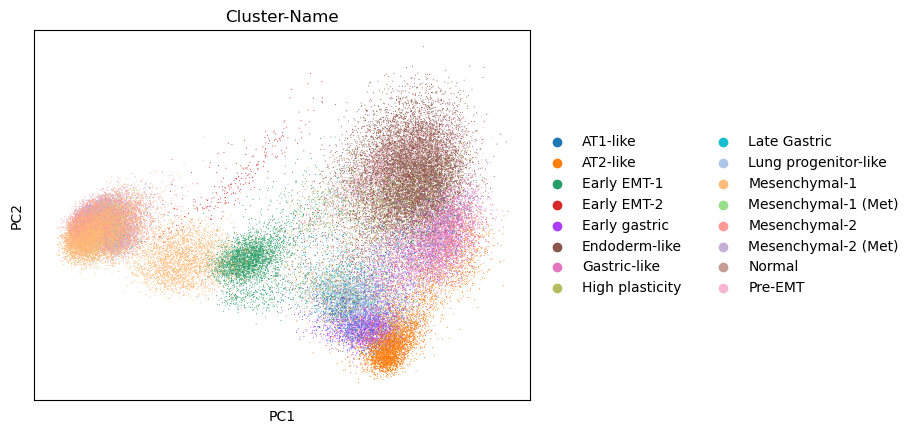

In [8]:
sc.tl.pca(adata)
sc.pl.pca(adata, color='Cluster-Name')

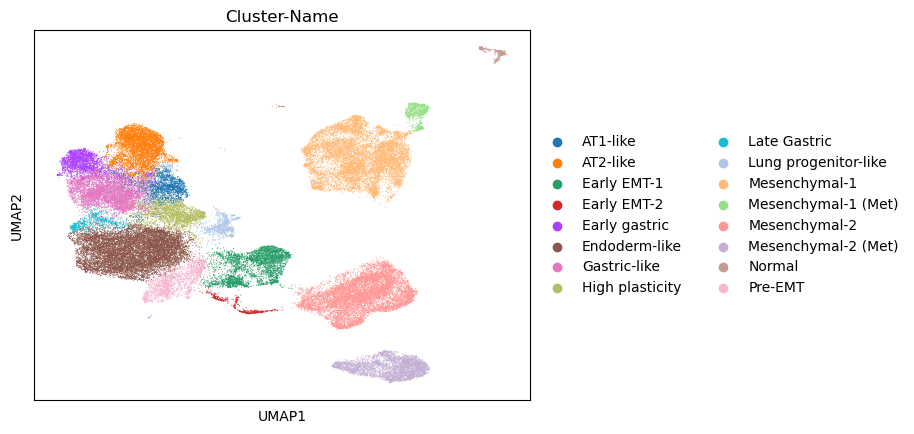

In [9]:
sc.pl.umap(adata, color='Cluster-Name')

In [10]:
sc.pp.highly_variable_genes(adata)
print(f"This detected {np.sum(adata.var['highly_variable'])} highly variable genes. ")

This detected 2156 highly variable genes. 


## Cell Complexity Index (CCI) Pseudotime

In [11]:
cci, gci = sctc.complexity_index(adata.X)
cci

array([0.8026238 , 0.81260645, 0.87082946, ..., 0.25374356, 0.18974864,
       0.21484905], dtype=float32)

In [12]:
len(gci)

20656

In [13]:
adata.var['gci'] = gci

In [14]:
len(cci)

58443

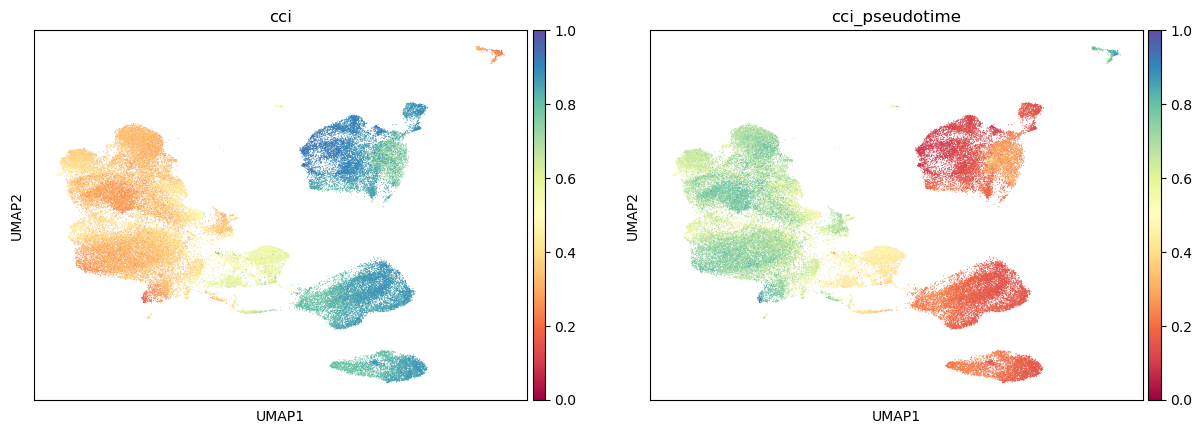

In [19]:
adata.obs['cci'] = cci
adata.obs['cci_pseudotime'] = 1 - cci
sc.pl.umap(adata, color=['cci', 'cci_pseudotime'], cmap=plt.cm.Spectral.name,vmax=None, vmin=None)

## Gene Diversity, CytoTRACE Pseudotime, and CCI Pseudotime

In [20]:
adata.obs['gene_diversity'] = np.sum(adata.X, axis=1)
min_div = np.min(adata.obs['gene_diversity'])
max_div = np.max(adata.obs['gene_diversity'])
adata.obs['norm_gene_diversity'] = (adata.obs['gene_diversity'] - min_div) / (max_div - min_div)

In [21]:
adata

AnnData object with n_obs × n_vars = 58443 × 20656
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name', 'n_genes', 'cci', 'cci_pseudotime', 'gene_diversity', 'norm_gene_diversity'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gci'
    uns: 'log1p', 'pca', 'Cluster-Name_colors', 'hvg'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'

/tmp/ipykernel_3992865/2954415643.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n])
/tmp/ipykernel_3992865/2954415643.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n])
/tmp/ipykernel_3992865/2954415643.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n])
/tmp/ipykernel_3992865/2954415643.py:44: UserWarning: FixedFormatter should only b

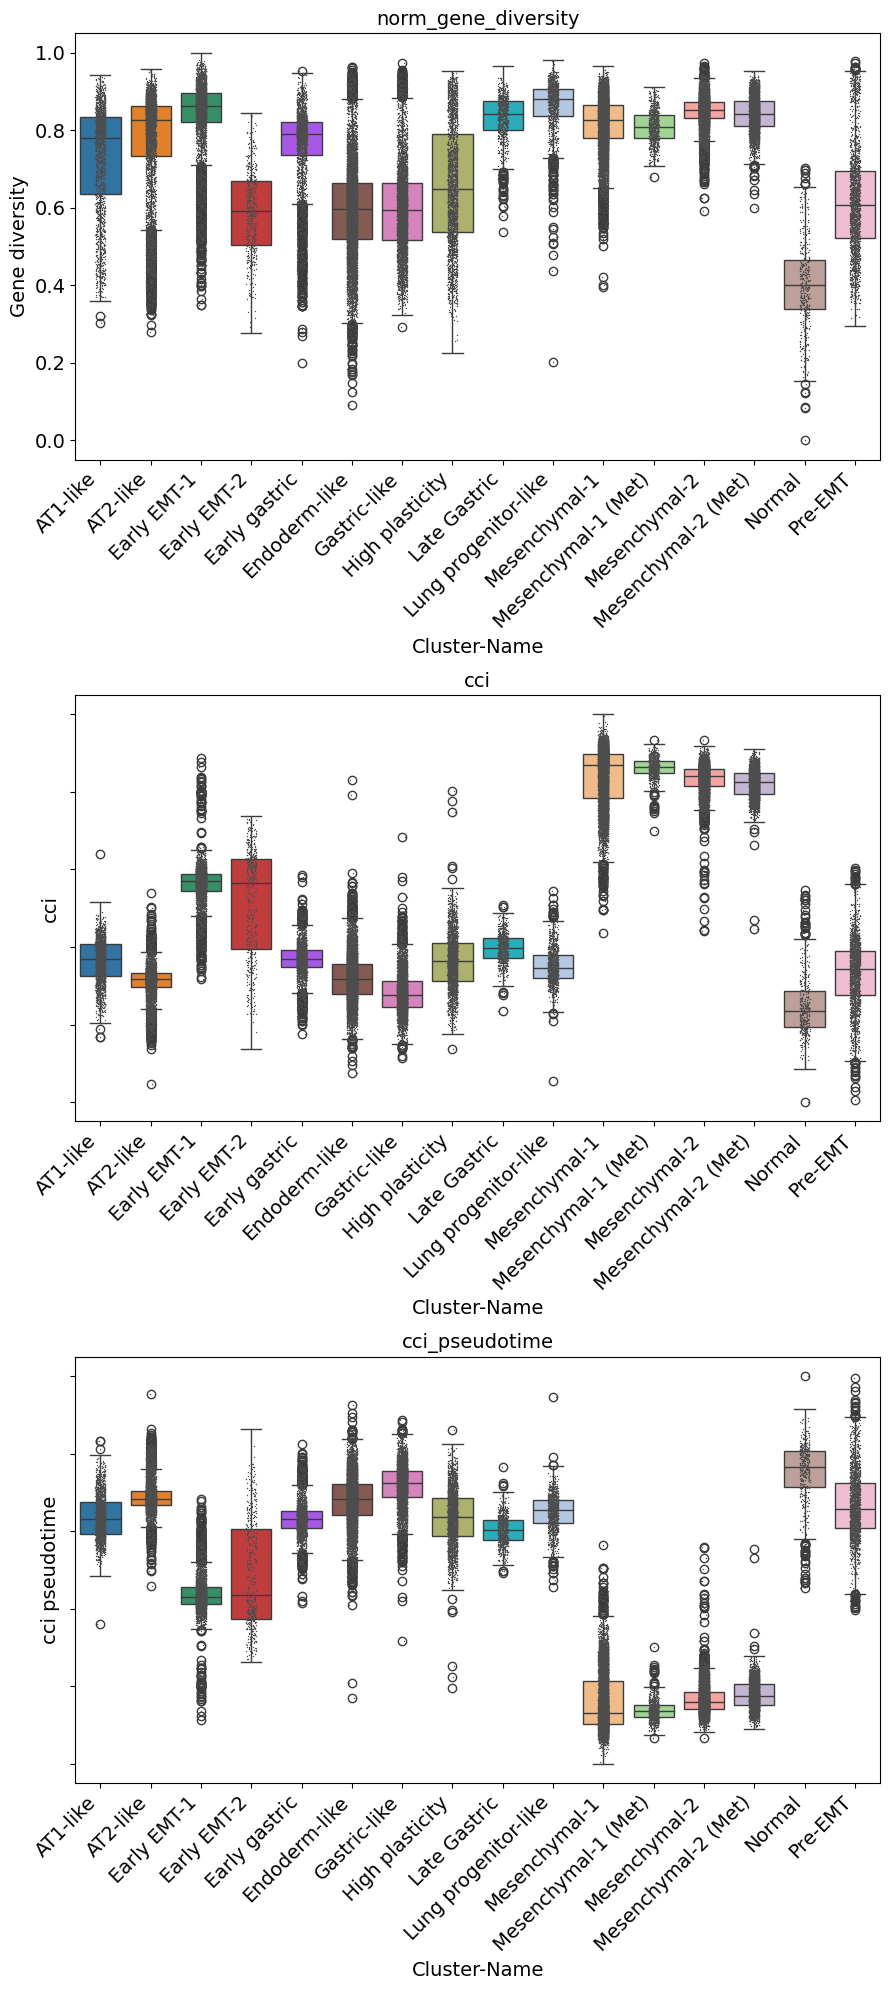

In [23]:
#sorted_time = ['AT2-like', 'AT1-like', 'High plasticity', 'Lung progenitor-like', 
#               'Early gastric', 'Gastric-like', 'Late Gastric', 'Endoderm-like', 
#               'Pre-EMT', 'Early EMT-1', 'Mesenchymal-1', 'Mesenchymal-1 (Met)', 
#               'Early EMT-2', 'Mesenchymal-2', 'Mesenchymal-2 (Met)']

#sorted_time = ['Endoderm-like', 'Mesenchymal-2', 'Mesenchymal-1', 'Gastric-like', 
#               'AT2-like', 'High plasticity', 'Mesenchymal-2 (Met)', 'Early EMT-1', 
#               'Early gastric', 'Pre-EMT', 'Lung progenitor-like', 'Mesenchymal-1 (Met)', 
#               'Late Gastric', 'Early EMT-2', 'AT1-like',]

sorted_time = ['AT1-like', 'AT2-like', 'Early EMT-1', 'Early EMT-2', 'Early gastric', 'Endoderm-like', 
               'Gastric-like', 'High plasticity', 'Late Gastric', 'Lung progenitor-like',
               'Mesenchymal-1', 'Mesenchymal-1 (Met)', 'Mesenchymal-2', 'Mesenchymal-2 (Met)', 
               'Normal', 'Pre-EMT', ]
fontsize = 14
obs_time = 'Cluster-Name'
time_colors = dict(zip(sorted_time, adata.uns['{}_colors'.format(obs_time)]))

f, axes = plt.subplots(3, 1, figsize=(9, 20))

keys = ['norm_gene_diversity', 'cci', 'cci_pseudotime']

n = 0
for key in keys:
    sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n])
    sns.stripplot(x=obs_time, y=key, data=adata.obs, size=1.0, color=".3", linewidth=0, ax=axes[n])
    n += 1
    
for ax in axes:
    ax.set_xlabel(obs_time, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

axes[0].set_ylabel('Gene diversity', fontsize=fontsize)
axes[1].set_ylabel('cci', fontsize=fontsize)
axes[2].set_ylabel('cci pseudotime', fontsize=fontsize)

axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

for n in range(len(keys)):
    axes[n].set_title(keys[n], fontsize=fontsize)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
plt.tight_layout()
plt.savefig('figures/boxplot_Genediversity_cci_normal_cancer.pdf')
plt.show()

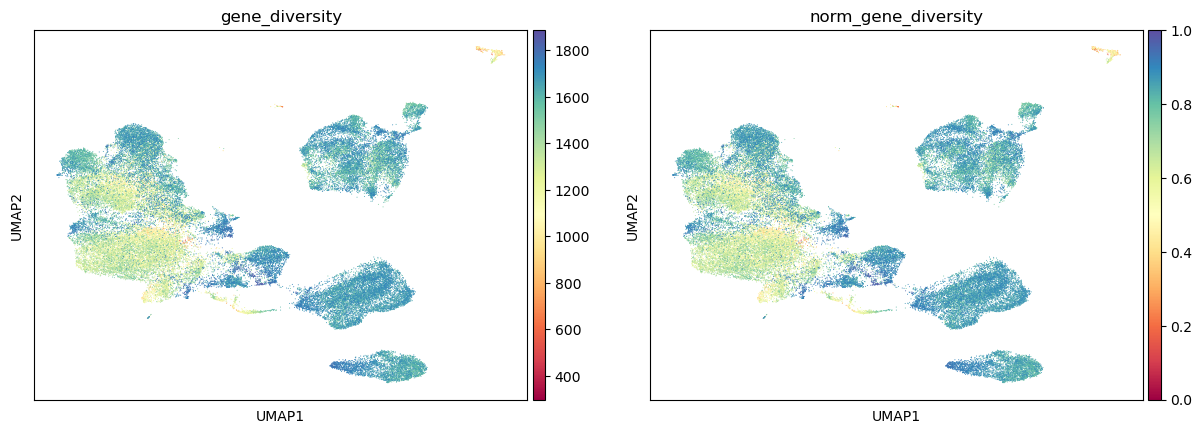

In [24]:
sc.pl.umap(adata, color=['gene_diversity','norm_gene_diversity'], cmap=plt.cm.Spectral.name,vmax=None, vmin=None,)

In [25]:
time_unique = adata.obs[obs_time].unique()
time_dict = dict(zip(sorted_time, range(len(time_unique))))
time_order = [time_dict[t] for t in adata.obs[obs_time]]

reverse_list = [i for i in range(len(time_unique))]
reverse_list.reverse()
reverse_time_dict = dict(zip(sorted_time, reverse_list))
reverse_time_order = [reverse_time_dict[t] for t in adata.obs[obs_time]] 

#scc_ct = ss.spearmanr(adata.obs['ct_pseudotime'], time_order)[0]
scc_cci = ss.spearmanr(adata.obs['cci_pseudotime'], time_order)[0]
#print('scc_ct: ', scc_ct)
print('scc_cci: ', scc_cci)

scc_cci:  -0.5565796564699531


## Calculating Complexity at Each Order for Cells and Genes

In [26]:
kcn, kgn = sctc.complexity_order(adata.X)
kcn

array([[0.85443775, 0.79906601, 0.8412397 , ..., 0.27852315, 0.39736705,
        0.39965927],
       [0.33236125, 0.35453686, 0.31729403, ..., 0.12057431, 0.35069284,
        0.33597511],
       [0.85366616, 0.84623766, 0.88564897, ..., 0.34687276, 0.31466218,
        0.35227305],
       ...,
       [0.48197343, 0.40986717, 0.36717268, ..., 0.67836812, 0.69449715,
        0.70303605],
       [0.51764706, 0.61568627, 0.42058824, ..., 0.4745098 , 0.52058824,
        0.4254902 ],
       [0.59554731, 0.49628942, 0.49814471, ..., 0.49814471, 0.42486085,
        0.56307978]])

In [27]:
kcn.shape

(30, 58443)

In [28]:
kgn.shape

(30, 20656)

In [29]:
adata.uns['kcn'] = kcn
adata.uns['kgn'] = kgn

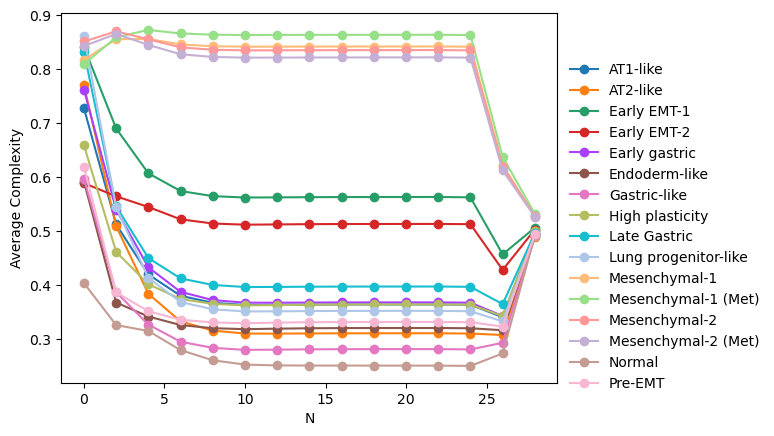

In [31]:
kcn = adata.uns['kcn']
n_list = range(0, 30, 2)

m = 0
for t in sorted_time:
    meankc_list = []
    for n in n_list:
        meankc = np.mean(kcn[n][adata.obs[obs_time]==t])
        meankc_list.append(meankc)
    plt.plot(n_list, meankc_list, marker='o', c=adata.uns['{}_colors'.format(obs_time)][m], label=t)
    m += 1
    
plt.legend(bbox_to_anchor=(1.0, 0.9), frameon=False)
plt.ylabel('Average Complexity')
plt.xlabel('N')
plt.savefig('figures/AverageComplexity_normal_cancer.pdf')
plt.show()

/tmp/ipykernel_3992865/4244138213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=adata.obs[obs_time], y=1-kcn[order_list[n]], palette=time_colors, ax=axes[n])
/tmp/ipykernel_3992865/4244138213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=adata.obs[obs_time], y=1-kcn[order_list[n]], palette=time_colors, ax=axes[n])
/tmp/ipykernel_3992865/4244138213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=adata.obs[obs_time], y=1-kcn[order_list[n]], palette=time_colors, ax=axes[n])
/tmp/ipykernel_3992865/4244138213.py:22: UserWarn

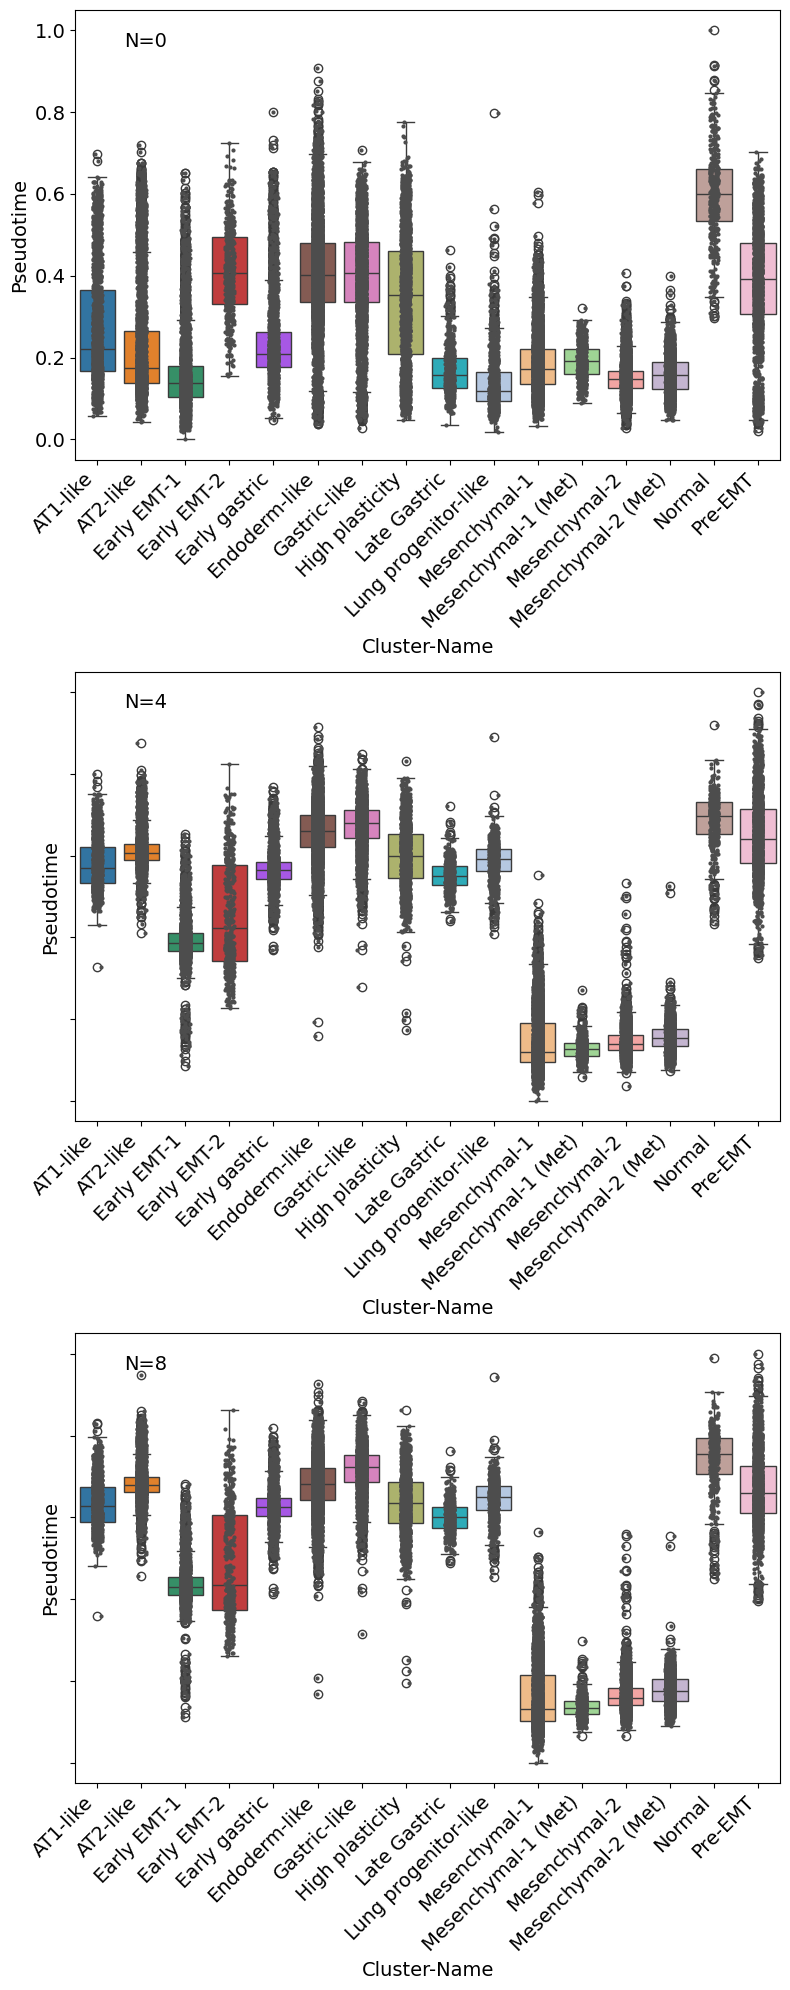

In [32]:
fontsize = 14
f, axes = plt.subplots(3, 1, figsize=(8, 20))

order_list = [0, 4, 8]
for n in range(len(order_list)):
    sns.boxplot(x=adata.obs[obs_time], y=1-kcn[order_list[n]], palette=time_colors, ax=axes[n])
    sns.stripplot(x=adata.obs[obs_time], y=1-kcn[order_list[n]], size=3, color=".3", linewidth=0, ax=axes[n])
    axes[n].tick_params(axis='x', rotation=0)
    axes[n].set_xlabel('')

for ax in axes:
    ax.set_xlabel(obs_time, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

axes[0].set_ylabel('Pseudotime', fontsize=fontsize)
axes[1].set_ylabel('Pseudotime', fontsize=fontsize)
axes[2].set_ylabel('Pseudotime', fontsize=fontsize)

axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
for n in range(len(order_list)):
    axes[n].set_title('N={}'.format(order_list[n]), x=0.1, y=0.9, fontsize=fontsize)

plt.tight_layout()  
plt.show()

### Ranking Cells by Nth-order complexity and CCI

In [33]:
# Choosing a subset of cells for visualization of cell ranking
n_choice = adata.n_obs
choice = np.random.choice(kcn.shape[1], n_choice, replace=False)
choice_kc = kcn[:, choice]
choice_cci = cci[choice]

# Converting complexity scores to rankings
n_list = list(range(0, 16, 2))
complexity_array = choice_kc[n_list]
complexity_array = np.vstack([complexity_array, choice_cci])
complexity_array = np.transpose(complexity_array)

In [34]:
complexity_array

array([[0.87101894, 0.58835604, 0.47446642, ..., 0.41992632, 0.42044791,
        0.42081326],
       [0.85251042, 0.55586505, 0.40098644, ..., 0.31576611, 0.31609665,
        0.31636059],
       [0.8757908 , 0.90210119, 0.89654594, ..., 0.88110521, 0.88125321,
        0.88137019],
       ...,
       [0.84874469, 0.87915538, 0.87959661, ..., 0.86541719, 0.86559368,
        0.86572868],
       [0.76781738, 0.90273739, 0.91914764, ..., 0.91142142, 0.91150068,
        0.91155213],
       [0.54418622, 0.34033615, 0.2989326 , ..., 0.25883334, 0.2595138 ,
        0.25996158]])

In [ ]:
cmap = plt.cm.get_cmap('Spectral', len(set(adata.obs['Cluster-Name'])))
cmap = [cmap(i) for i in range(len(set(adata.obs['Cluster-Name'])))]
cmap = dict(zip(adata.obs['Cluster-Name'].unique(), cmap))
colors = [cmap[day] for day in adata.obs['Cluster-Name'][choice]]

ranking_lists = sctc.convert_to_ranking(complexity_array)
fig, ax = sctc.ranking_plot(ranking_lists, colors, marker_size=1, line_width=0.5)
fig.set_size_inches(10, 19)

xticks = []
xticks.extend([str(i) for i in order_list])
xticks.append('CCI')
ax.set_xticks(range(len(xticks)))
ax.set_xticklabels(xticks)
yticks = range(0, n_choice+1, 100)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks[::-1],)
ax.set_xlabel('N')
ax.set_ylabel('Index')
plt.show()

### The Diversity-Complexity Diagrams of Single-Cell Gene Expression

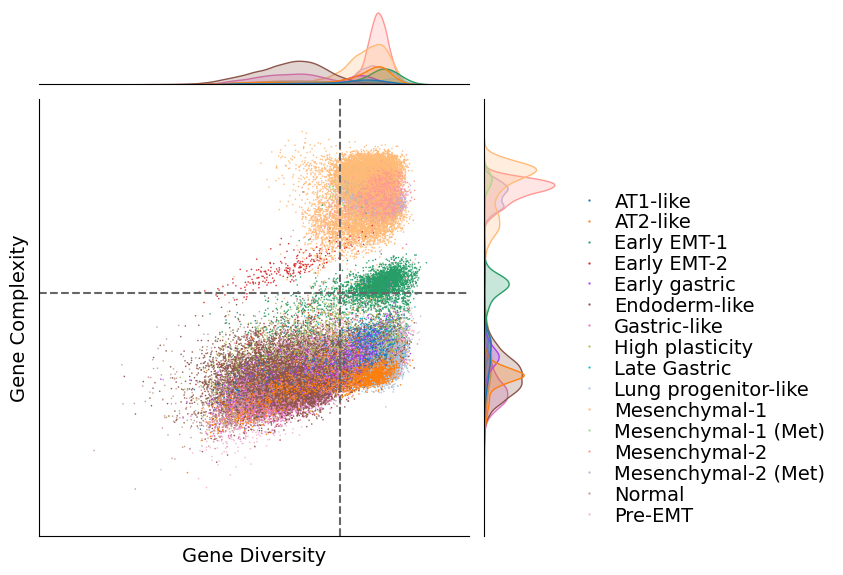

In [37]:
cell_gci = adata.X * gci
cell_mean_gci = np.sum(cell_gci, axis=1) / np.sum(adata.X, axis=1)

diversity = adata.obs['gene_diversity']
diversity_gci = np.transpose(np.vstack((diversity, cell_mean_gci)))

mean_diversity = np.mean(diversity)
mean_gci = np.mean(cell_mean_gci)

adata.obsm['X_diversity_gci'] = diversity_gci

fontsize = 14

adata.obs['mean_gci'] = cell_mean_gci

g = sns.jointplot(x='gene_diversity',
                  y='mean_gci',
                  hue='Cluster-Name',
                  s=1,
                  palette=adata.uns['Cluster-Name_colors'],
                  edgecolor=None,
                  data=adata.obs)

g.ax_joint.legend_._visible=False
g.fig.legend(ncol=1, 
           bbox_to_anchor=(1.45, 0.7),
           markerscale=1.5,
           labelspacing=0.1,
           fontsize=fontsize,
           handlelength=1,
           frameon=False)

g.ax_joint.set_xticks([])
g.ax_joint.set_yticks([])
g.ax_joint.set_xticklabels([])
g.ax_joint.set_yticklabels([])
g.ax_joint.set_xlabel('Gene Diversity', fontsize=fontsize)
g.ax_joint.set_ylabel('Gene Complexity', fontsize=fontsize)
g.ax_marg_x.set_yticks([])

g.ax_joint.axvline(mean_diversity, color='#666666', linestyle='--')
g.ax_joint.axhline(mean_gci, color='#666666', linestyle='--')

plt.savefig('figures/jointplot_Genediversity_Genecomplexity_normal_cancer.pdf')
plt.show()

In [38]:
cell_gci.shape

(58443, 20656)

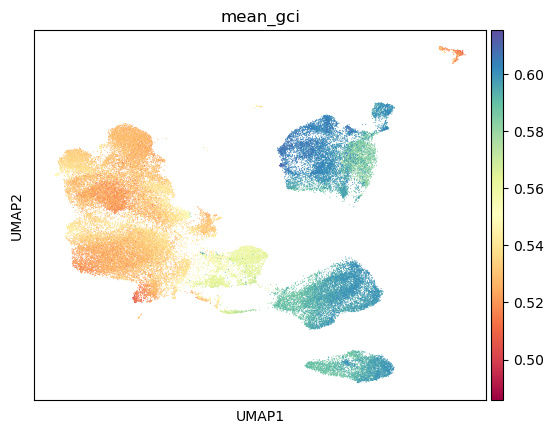

In [39]:
sc.pl.umap(adata, color=['mean_gci'], cmap=plt.cm.Spectral.name,vmax=None, vmin=None, )

### Silhouette Coefficient of Gene Complexity as a Function of Complexity Order 

In [40]:
from sklearn.metrics import silhouette_score

n_list = range(1, 13, 2)
mean_kg_list = []
for n in n_list:
    cell_kg = adata.X * kgn[n]
    cell_mean_kg = np.sum(cell_kg, axis=1) / np.sum(adata.X, axis=1)
    mean_kg_list.append(cell_mean_kg)
    
mean_kg_list = np.array(mean_kg_list)

shc_kg = []
shc_kg.append(silhouette_score(np.array(adata.obs['gene_diversity']).reshape(-1, 1), reverse_time_order))
for mean_kg in mean_kg_list:
    shc_kg.append(silhouette_score(np.array(mean_kg).reshape(-1, 1), reverse_time_order))

#shc_ct = silhouette_score(np.array(1-adata.obs['ct_pseudotime']).reshape(-1, 1), reverse_time_order)

## Distributions of top genes and bottom genes

In [41]:
argsort_gci = np.argsort(gci)
argsort_gci = np.flip(argsort_gci)

In [42]:
argsort_gci

array([ 3267,  3587,   666, ..., 19611,  2778,  7183])

In [43]:
adata.var.index[argsort_gci]

Index(['4930550L24Rik', '4933428M09Rik', 'Gm28187', 'Khdc1c', '4930563I02Rik',
       'Gm37381', 'Klk1b27', 'A330033J07Rik', 'Ceacam15', '6430584L05Rik',
       ...
       'Scpep1os', 'Akr1c6', 'Gm11099', 'Gm26577', 'Gm29477', 'Sult2a2',
       'Olfr323', 'Gm10549', 'Gm11454', 'Gm34086'],
      dtype='object', length=20656)

In [44]:
import cmasher as cmr
import matplotlib

def map_to_grid(i, nrows, ncols):
  
  x = i // ncols
  y = i % ncols

  return x, y

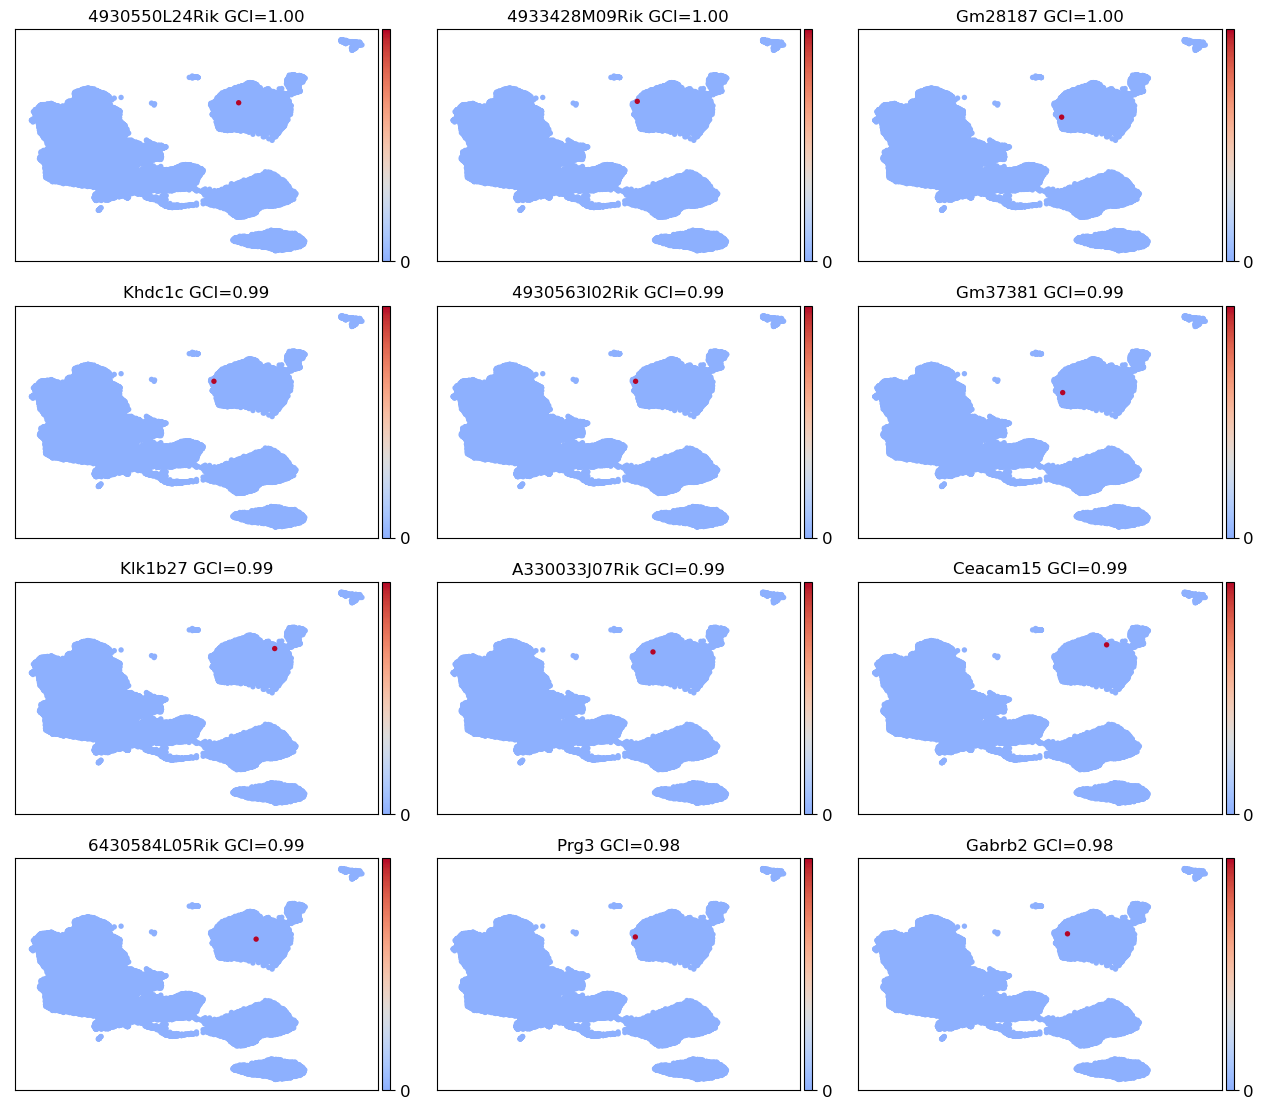

In [45]:
new_cmap = cmr.get_sub_cmap(plt.cm.coolwarm.name, 0.25, 1.0)
ntop = 12
top_gene = [adata.var.index[argsort_gci[i]] for i in range(ntop)]

nrows=4
ncols=3
figsize=4
wspace=0.1
hspace=0.1
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1), nrows*2.8))
plt.subplots_adjust(wspace=wspace)
plt.subplots_adjust(hspace=hspace)

n = 0
for gene in top_gene:
    x, y = map_to_grid(n, nrows, ncols)
    sc.pl.umap(adata, color=gene, ax=axs[x, y], size=60, cmap=new_cmap, show=False)
    
    cbar = axs[x, y].collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    cbar.locator = matplotlib.ticker.MultipleLocator(1)
    axs[x, y].set_xlabel('')
    axs[x, y].set_ylabel('')
    axs[x, y].set_title('{} GCI={:.2f}'.format(top_gene[n], gci[argsort_gci[n]]))
    n += 1

plt.tight_layout()
plt.savefig('figures/top12_gene_normal_cancer.pdf')
plt.show()

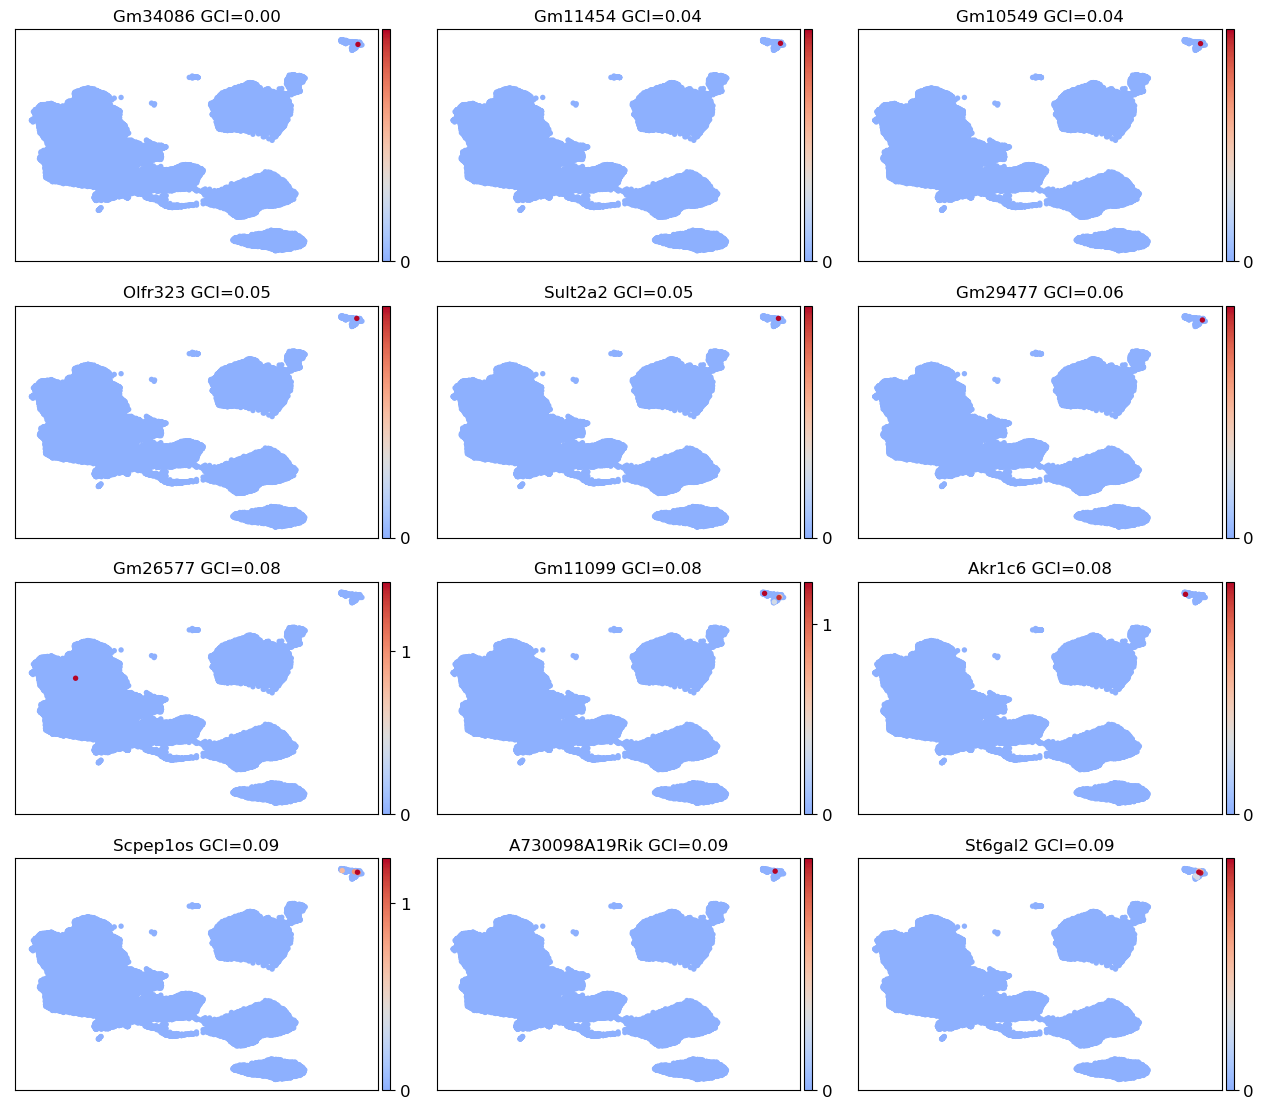

In [46]:
nbottom = 12
bottom_gene = [adata.var.index[argsort_gci[-i]] for i in range(1, nbottom+1)]

nrows=4
ncols=3
figsize=4
wspace=0.1
hspace=0.1
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1), nrows*2.8))
plt.subplots_adjust(wspace=wspace)
plt.subplots_adjust(hspace=hspace)

n = 1
for gene in bottom_gene:
    x, y = map_to_grid(n-1, nrows, ncols)
    sc.pl.umap(adata, color=gene, ax=axs[x, y], size=60, cmap=new_cmap, show=False)
    
    cbar = axs[x, y].collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    cbar.locator = matplotlib.ticker.MultipleLocator(1)
    axs[x, y].set_xlabel('')
    axs[x, y].set_ylabel('')
    axs[x, y].set_title('{} GCI={:.2f}'.format(bottom_gene[n-1], gci[argsort_gci[-n]]))
    n += 1

plt.tight_layout()
plt.savefig('figures/bottom12_gene_normal_cancer.pdf')
plt.show()

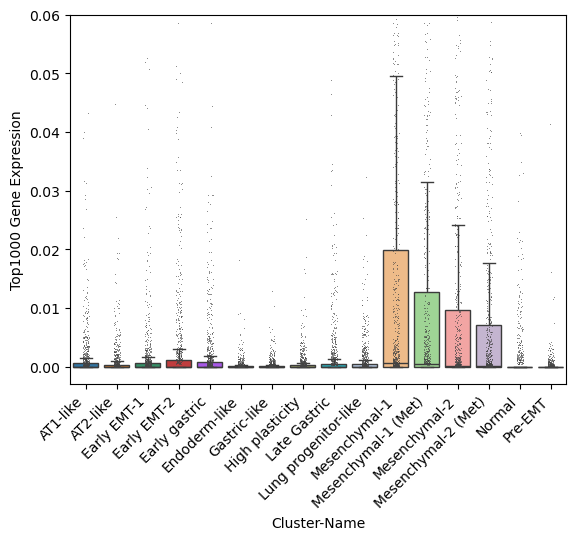

In [74]:
ntop = 1000
top_gene = [adata.var.index[argsort_gci[i]] for i in range(ntop)]

top_gene_expr = []

for i in range(ntop):
    gene = top_gene[i]
    top_gene_expr.append([])
    for t in sorted_time:
        gene_expr = adata.X[adata.obs[obs_time]==t, adata.var.index==gene].flatten()
        top_gene_expr[i].append(np.mean(gene_expr))
        
top_gene_expr = np.array(top_gene_expr)

sns.boxplot(data=top_gene_expr, palette=[time_colors[t] for t in sorted_time], showfliers=False)
sns.stripplot(data=top_gene_expr, size=0.5, color=".3", linewidth=0)
plt.xticks(ticks=range(len(sorted_time)), labels=sorted_time)
plt.xlabel(obs_time)
plt.ylabel('Top1000 Gene Expression')
plt.ylim(-0.003, 0.06)
plt.xticks(rotation=45, ha='right')
plt.savefig('figures/top1000gene_expression_normal_cancer.pdf')
plt.show()

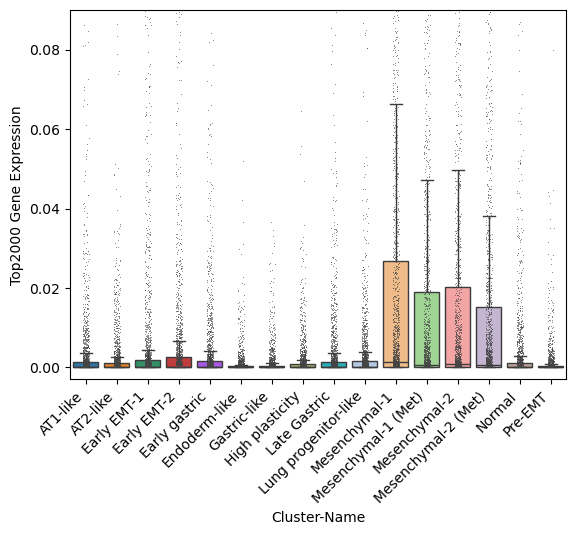

In [78]:
ntop = 2000
top_gene = [adata.var.index[argsort_gci[i]] for i in range(ntop)]

top_gene_expr = []

for i in range(ntop):
    gene = top_gene[i]
    top_gene_expr.append([])
    for t in sorted_time:
        gene_expr = adata.X[adata.obs[obs_time]==t, adata.var.index==gene].flatten()
        top_gene_expr[i].append(np.mean(gene_expr))
        
top_gene_expr = np.array(top_gene_expr)

sns.boxplot(data=top_gene_expr, palette=[time_colors[t] for t in sorted_time], showfliers=False)
sns.stripplot(data=top_gene_expr, size=0.5, color=".3", linewidth=0)
plt.xticks(ticks=range(len(sorted_time)), labels=sorted_time)
plt.xlabel(obs_time)
plt.ylabel('Top2000 Gene Expression')
plt.ylim(-0.003, 0.09)
plt.xticks(rotation=45, ha='right')
plt.savefig('figures/top2000gene_expression_normal_cancer.pdf')
plt.show()

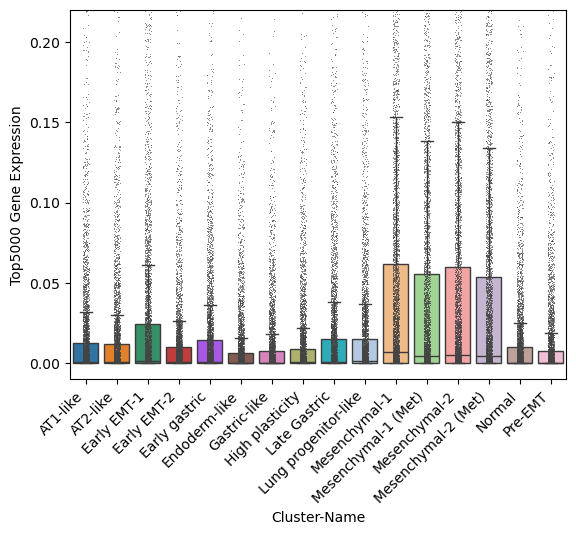

In [85]:
ntop = 5000
top_gene = [adata.var.index[argsort_gci[i]] for i in range(ntop)]

top_gene_expr = []

for i in range(ntop):
    gene = top_gene[i]
    top_gene_expr.append([])
    for t in sorted_time:
        gene_expr = adata.X[adata.obs[obs_time]==t, adata.var.index==gene].flatten()
        top_gene_expr[i].append(np.mean(gene_expr))
        
top_gene_expr = np.array(top_gene_expr)

sns.boxplot(data=top_gene_expr, palette=[time_colors[t] for t in sorted_time], showfliers=False)
sns.stripplot(data=top_gene_expr, size=0.5, color=".3", linewidth=0)
plt.xticks(ticks=range(len(sorted_time)), labels=sorted_time)
plt.xlabel(obs_time)
plt.ylabel('Top5000 Gene Expression')
plt.ylim(-0.01, 0.22)
plt.xticks(rotation=45, ha='right')
plt.savefig('figures/top5000gene_expression_normal_cancer.pdf')
plt.show()

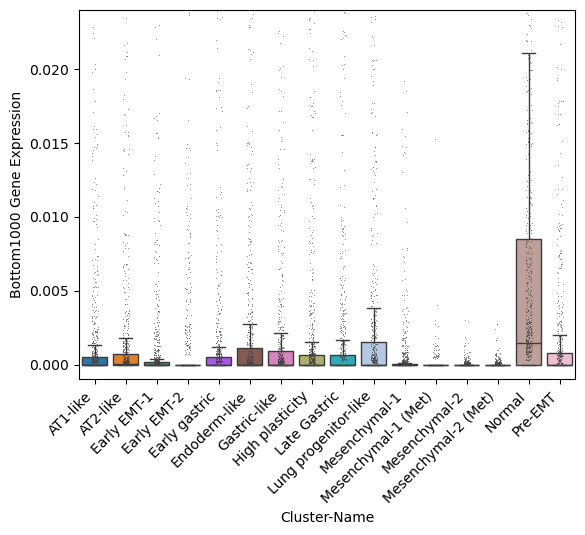

In [75]:
nbottom = ntop
bottom_gene = [adata.var.index[argsort_gci[-i]] for i in range(1, nbottom+1)]

bottom_gene_expr = []

for i in range(nbottom):
    gene = bottom_gene[i]
    bottom_gene_expr.append([])
    for t in sorted_time:
        gene_expr = adata.X[adata.obs[obs_time]==t, adata.var.index==gene].flatten()
        bottom_gene_expr[i].append(np.mean(gene_expr))
        
bottom_gene_expr = np.array(bottom_gene_expr)

sns.boxplot(data=bottom_gene_expr, palette=[time_colors[t] for t in sorted_time], showfliers=False)
sns.stripplot(data=bottom_gene_expr, size=0.5, color=".3", linewidth=0)
plt.xticks(ticks=range(len(sorted_time)), labels=sorted_time)
plt.xlabel(obs_time)
plt.ylabel('Bottom1000 Gene Expression')
plt.ylim(-0.001, 0.024)
plt.xticks(rotation=45, ha='right')
plt.savefig('figures/bottom1000gene_expression_normal_cancer.pdf')
plt.show()

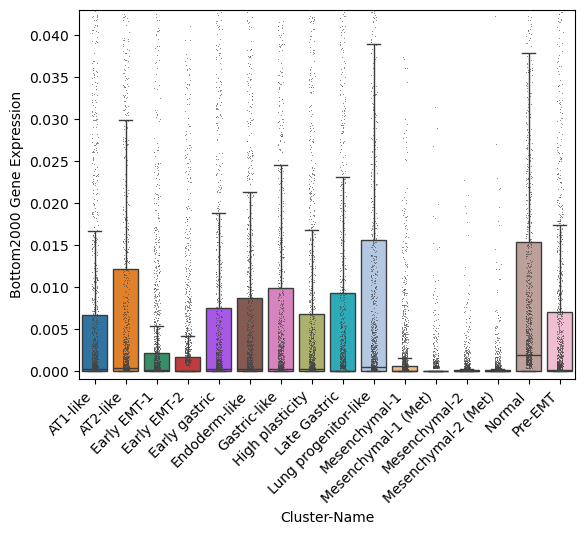

In [82]:
nbottom = ntop
bottom_gene = [adata.var.index[argsort_gci[-i]] for i in range(1, nbottom+1)]

bottom_gene_expr = []

for i in range(nbottom):
    gene = bottom_gene[i]
    bottom_gene_expr.append([])
    for t in sorted_time:
        gene_expr = adata.X[adata.obs[obs_time]==t, adata.var.index==gene].flatten()
        bottom_gene_expr[i].append(np.mean(gene_expr))
        
bottom_gene_expr = np.array(bottom_gene_expr)

sns.boxplot(data=bottom_gene_expr, palette=[time_colors[t] for t in sorted_time], showfliers=False)
sns.stripplot(data=bottom_gene_expr, size=0.5, color=".3", linewidth=0)
plt.xticks(ticks=range(len(sorted_time)), labels=sorted_time)
plt.xlabel(obs_time)
plt.ylabel('Bottom2000 Gene Expression')
plt.ylim(-0.001, 0.043)
plt.xticks(rotation=45, ha='right')
plt.savefig('figures/bottom2000gene_expression_normal_cancer.pdf')
plt.show()

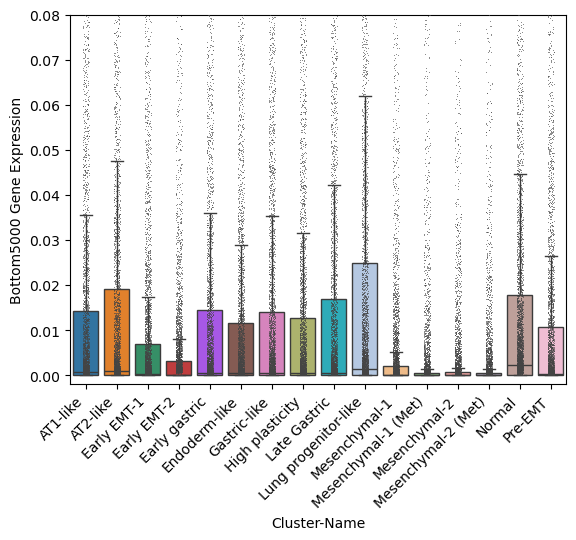

In [88]:
nbottom = ntop
bottom_gene = [adata.var.index[argsort_gci[-i]] for i in range(1, nbottom+1)]

bottom_gene_expr = []

for i in range(nbottom):
    gene = bottom_gene[i]
    bottom_gene_expr.append([])
    for t in sorted_time:
        gene_expr = adata.X[adata.obs[obs_time]==t, adata.var.index==gene].flatten()
        bottom_gene_expr[i].append(np.mean(gene_expr))
        
bottom_gene_expr = np.array(bottom_gene_expr)

sns.boxplot(data=bottom_gene_expr, palette=[time_colors[t] for t in sorted_time], showfliers=False)
sns.stripplot(data=bottom_gene_expr, size=0.5, color=".3", linewidth=0)
plt.xticks(ticks=range(len(sorted_time)), labels=sorted_time)
plt.xlabel(obs_time)
plt.ylabel('Bottom5000 Gene Expression')
plt.ylim(-0.002, 0.08)
plt.xticks(rotation=45, ha='right')
plt.savefig('figures/bottom5000gene_expression_normal_cancer.pdf')
plt.show()

In [51]:
adata

AnnData object with n_obs × n_vars = 58443 × 20656
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name', 'n_genes', 'cci', 'cci_pseudotime', 'gene_diversity', 'norm_gene_diversity', 'mean_gci'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gci'
    uns: 'log1p', 'pca', 'Cluster-Name_colors', 'hvg', 'kcn', 'kgn'
    obsm: 'X_scVI', 'X_umap', 'X_pca', 'X_diversity_gci'
    varm: 'PCs'

In [52]:
adata.write('adata_normal_cancer_sctc.h5ad')

# Pearson Correlation Coefficients (PCC)

In [53]:
gene_proxim = sctc.gene_proximity(adata.X)
gene_space = sctc.gene_space(gene_proxim)

### The Average Degree of Expressed Genes in Gene Space for Each Cell

In [54]:
from tqdm import tqdm

cell_mean_degree = []
for i in tqdm(range(adata.n_obs)):
    sum_degree = 0
    n_gene = 0
    for j in range(adata.X.shape[1]):
        if adata.X[i, j] > 0:
            sum_degree += gene_space.degree(j)
            n_gene += 1
    cell_mean_degree.append(sum_degree/n_gene)

100%|█████████████████████████████████████████████████████████| 58443/58443 [53:01<00:00, 18.37it/s]


In [55]:
len(cell_mean_degree)

58443

In [56]:
adata.obs['cell_mean_degree'] = cell_mean_degree

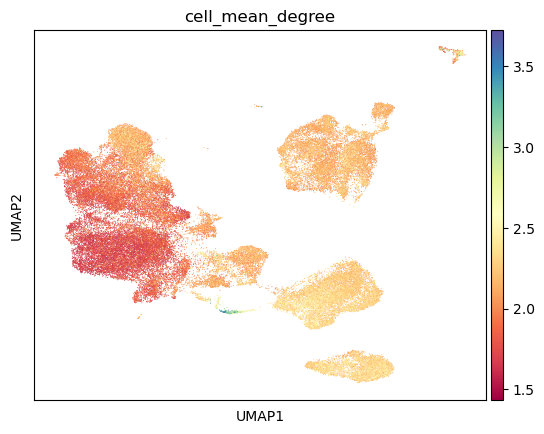

In [57]:
sc.pl.umap(adata, color=['cell_mean_degree'], cmap=plt.cm.Spectral.name,vmax=None, vmin=None, )

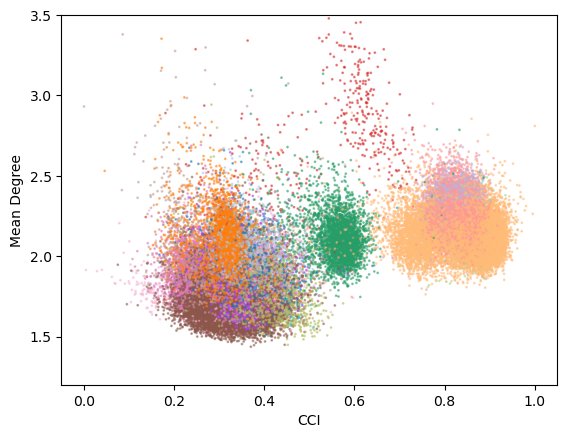

PearsonRResult(statistic=0.6508542674493633, pvalue=0.0)

In [59]:
colors = []
for day in adata.obs[obs_time]:
    colors.append(time_colors[day])

plt.scatter(cci, cell_mean_degree, s=1, c=colors, alpha=0.5)
plt.ylim(1.2, 3.5)
plt.xlabel('CCI')
plt.ylabel('Mean Degree')
plt.savefig('figures/MeanDegree_CCI_normal_cancer.pdf')
plt.show()

ss.pearsonr(cci, cell_mean_degree)

### Expression Level 

In [60]:
cell_gene_expression = np.sum(adata.X, axis=1)

minv = np.min(cell_gene_expression)
maxv = np.max(cell_gene_expression)
cell_gene_expression = (cell_gene_expression - minv) / (maxv - minv)

In [61]:
len(cell_gene_expression)

58443

In [62]:
adata.obs['cell_gene_expression'] = cell_gene_expression

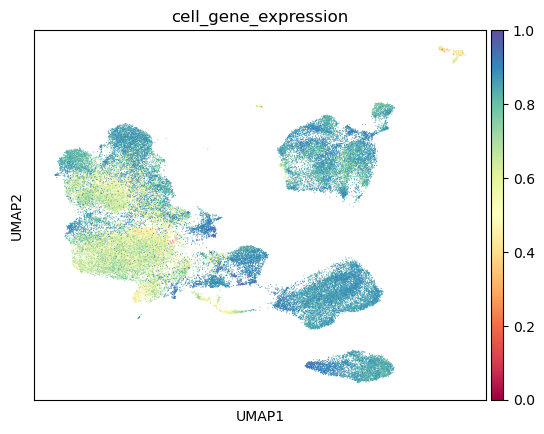

In [63]:
sc.pl.umap(adata, color=['cell_gene_expression'], cmap=plt.cm.Spectral.name,vmax=None, vmin=None,)

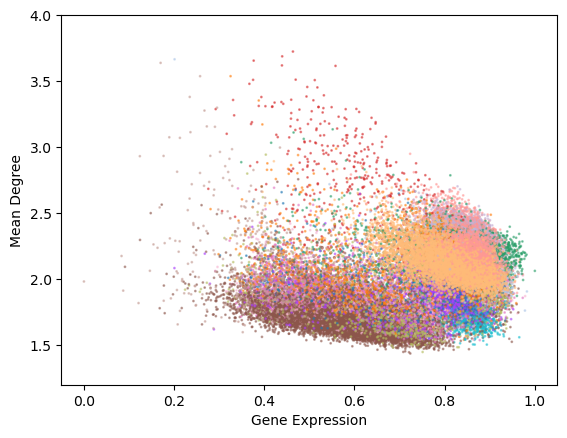

PearsonRResult(statistic=0.41443085277259534, pvalue=0.0)

In [65]:
plt.scatter(cell_gene_expression, cell_mean_degree, c=colors, s=1, alpha=0.5)
plt.ylim(1.2, 4)
plt.xlabel('Gene Expression')
plt.ylabel('Mean Degree')
plt.savefig('figures/MeanDegree_GeneExpression_normal_cancer.pdf')
plt.show()

ss.pearsonr(cell_gene_expression, cell_mean_degree)

In [66]:
adata

AnnData object with n_obs × n_vars = 58443 × 20656
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name', 'n_genes', 'cci', 'cci_pseudotime', 'gene_diversity', 'norm_gene_diversity', 'mean_gci', 'cell_mean_degree', 'cell_gene_expression'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gci'
    uns: 'log1p', 'pca', 'Cluster-Name_colors', 'hvg', 'kcn', 'kgn'
    obsm: 'X_scVI', 'X_umap', 'X_pca', 'X_diversity_gci'
    varm: 'PCs'

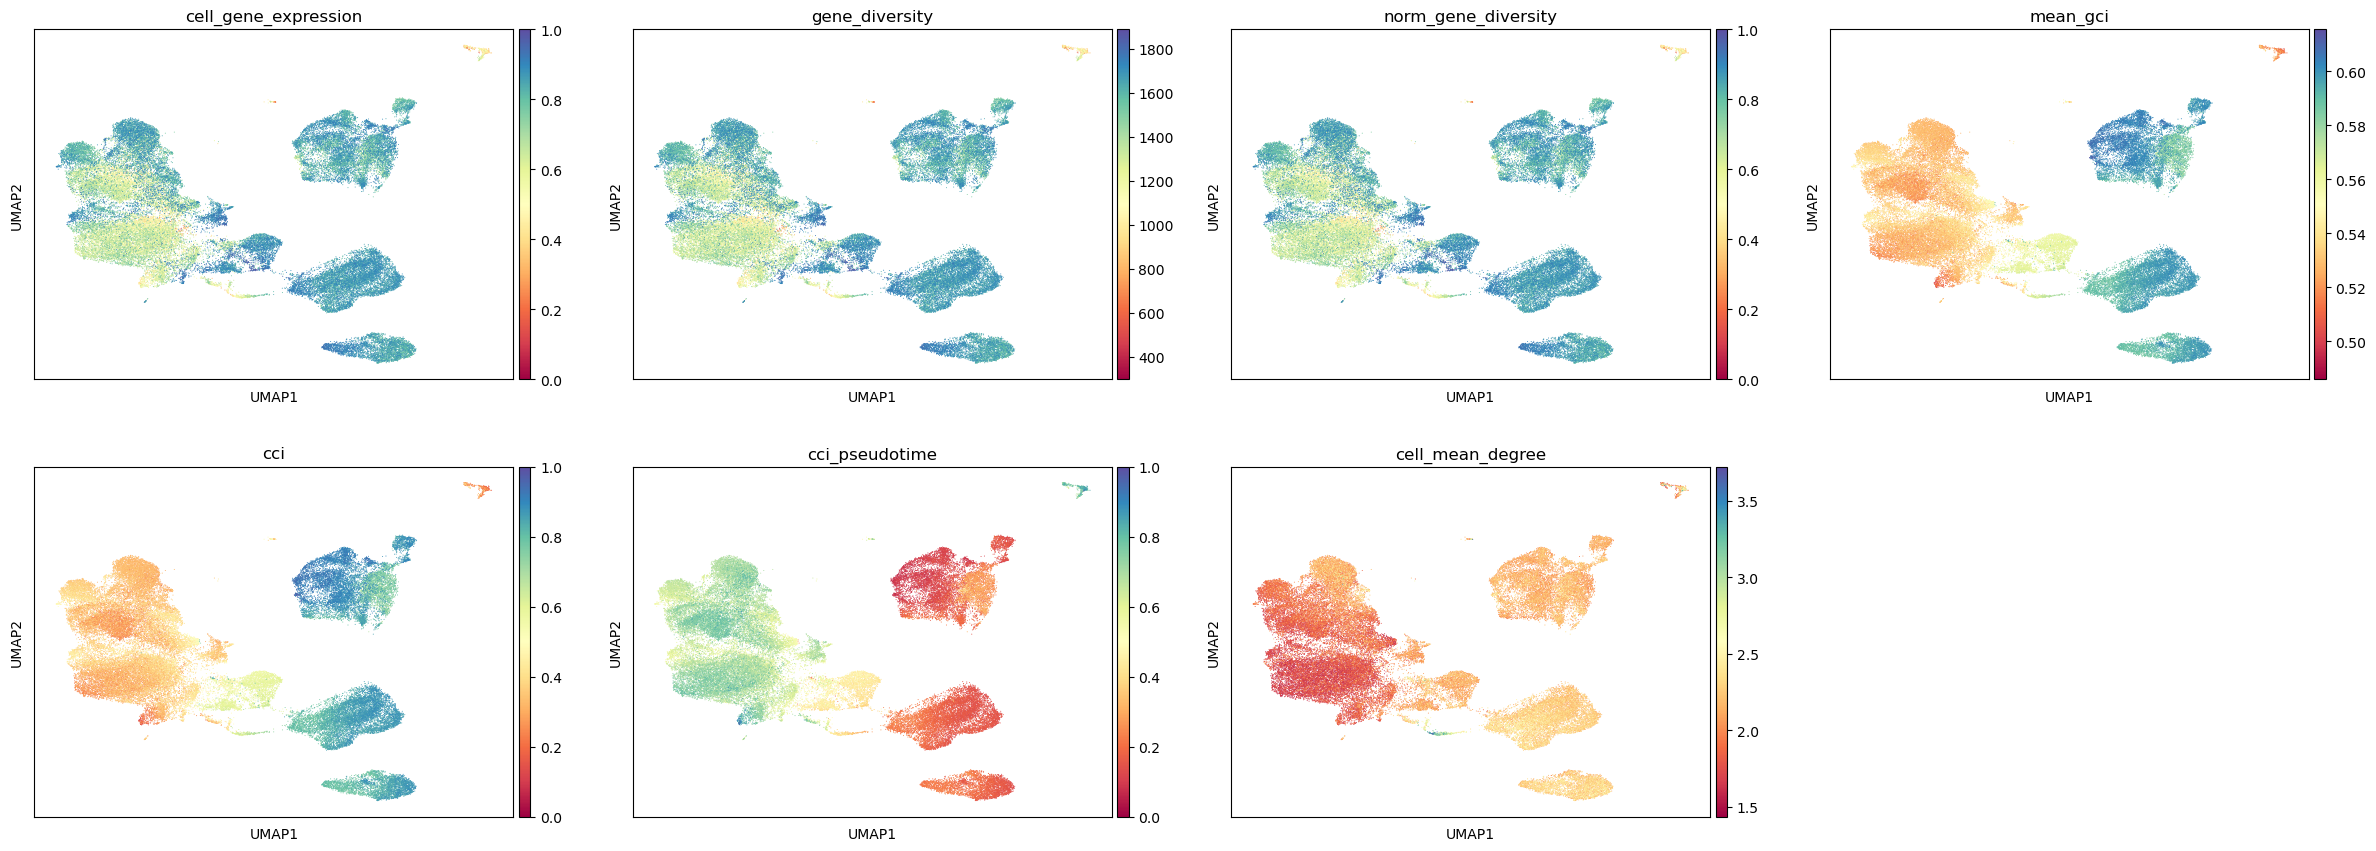

In [67]:
sc.pl.umap(adata, 
           color=['cell_gene_expression', 'gene_diversity', 'norm_gene_diversity', 'mean_gci', 'cci', 'cci_pseudotime', 'cell_mean_degree'], 
           cmap=plt.cm.Spectral.name,)

/tmp/ipykernel_3992865/3163466376.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n])
/tmp/ipykernel_3992865/3163466376.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n])
/tmp/ipykernel_3992865/3163466376.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n])
/tmp/ipykernel_3992865/3163466376.py:10: FutureWarning: 

Passing `palette` withou

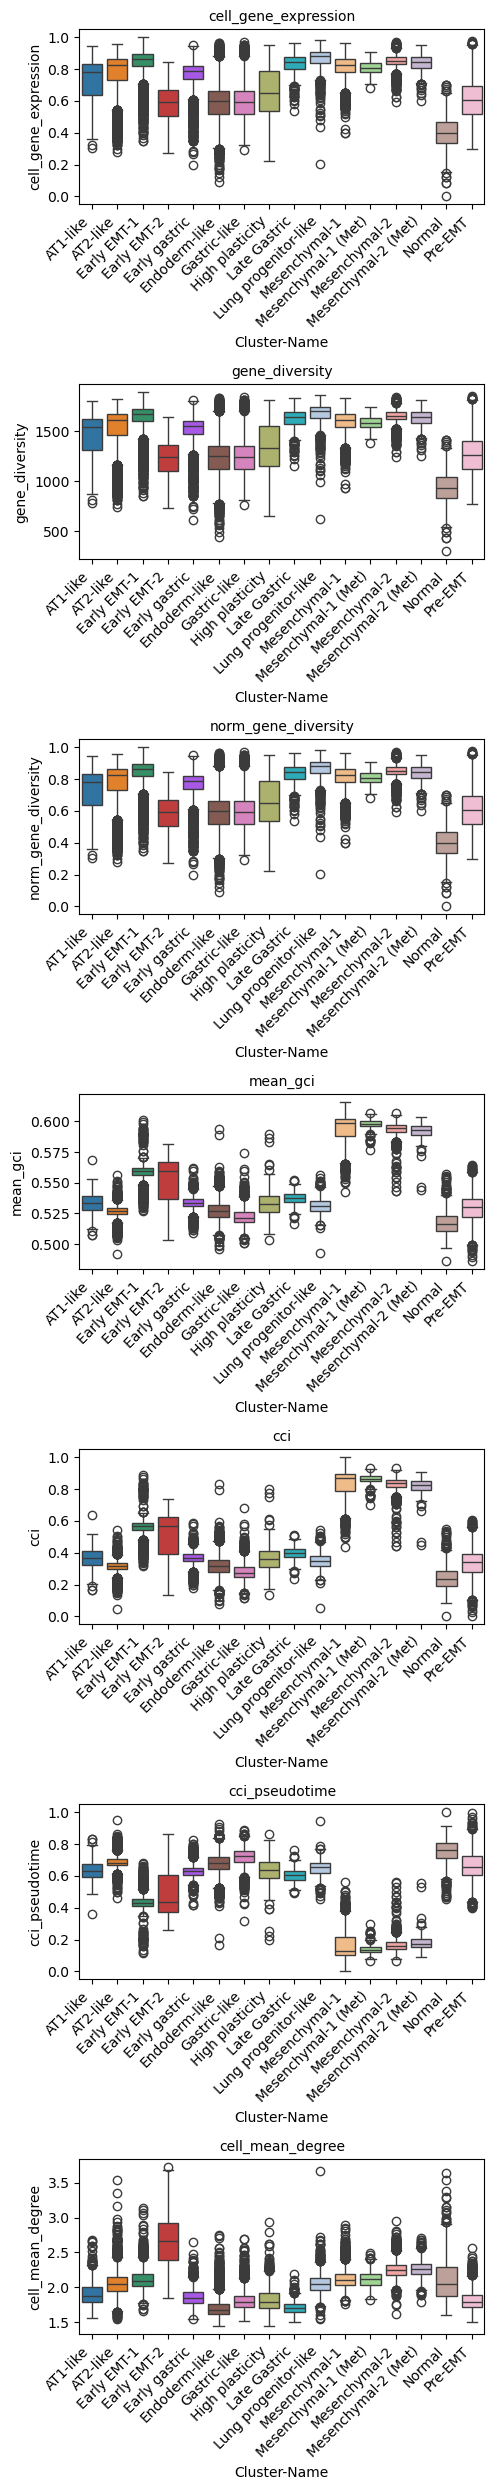

In [68]:
fontsize = 10
time_colors = dict(zip(sorted_time, adata.uns['{}_colors'.format(obs_time)]))

f, axes = plt.subplots(7, 1, figsize=(5, 25))

keys = ['cell_gene_expression', 'gene_diversity', 'norm_gene_diversity', 'mean_gci', 'cci', 'cci_pseudotime', 'cell_mean_degree']

n = 0
for key in keys:
    sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n])
    #sns.stripplot(x=obs_time, y=key, data=adata.obs, size=1.0, color=".3", linewidth=0, ax=axes[n])
    n += 1
    
for ax in axes:
    ax.set_xlabel(obs_time, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

#axes[0].set_ylabel('Pseudotime', fontsize=fontsize)
#axes[1].set_ylabel('')
#axes[2].set_ylabel('')

#axes[1].set_yticklabels([])
#axes[2].set_yticklabels([])
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
for n in range(len(keys)):
    axes[n].set_title(keys[n], fontsize=fontsize)

plt.tight_layout()
plt.savefig('figures/boxplot_normal_cancer.pdf')
plt.show()

/tmp/ipykernel_3992865/1302536247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n], showfliers=False)
/tmp/ipykernel_3992865/1302536247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n], showfliers=False)
/tmp/ipykernel_3992865/1302536247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n], showfliers=False)
/tmp/ipykernel_3992865/13025

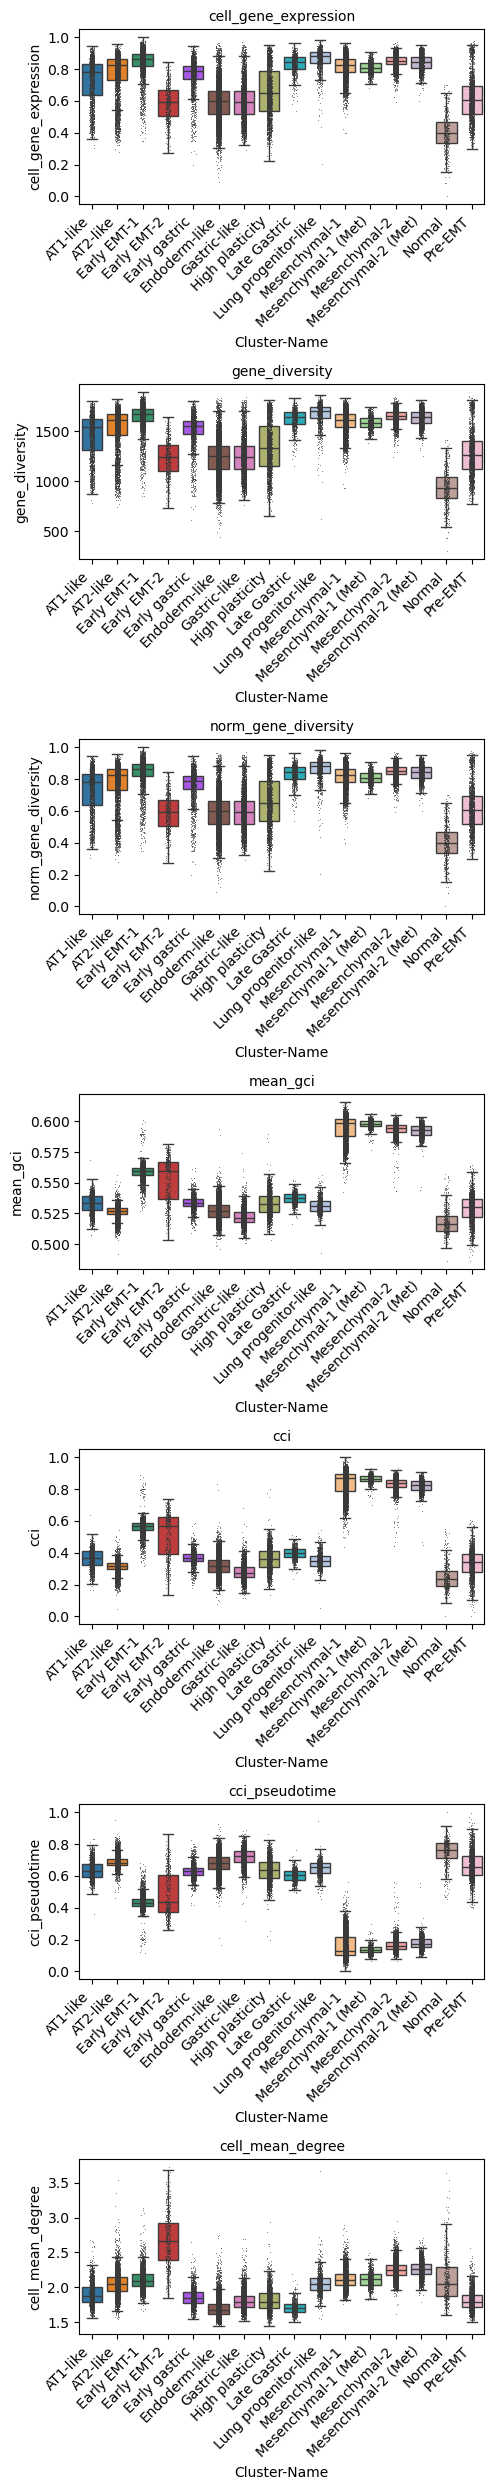

In [70]:
fontsize = 10
time_colors = dict(zip(sorted_time, adata.uns['{}_colors'.format(obs_time)]))

f, axes = plt.subplots(7, 1, figsize=(5, 25))

keys = ['cell_gene_expression', 'gene_diversity', 'norm_gene_diversity', 'mean_gci', 'cci', 'cci_pseudotime', 'cell_mean_degree']

n = 0
for key in keys:
    sns.boxplot(x=obs_time, y=key, data=adata.obs, palette=time_colors, ax=axes[n], showfliers=False)
    sns.stripplot(x=obs_time, y=key, data=adata.obs, size=0.5, color=".3", linewidth=0, ax=axes[n])
    n += 1
    
for ax in axes:
    ax.set_xlabel(obs_time, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

#axes[0].set_ylabel('Pseudotime', fontsize=fontsize)
#axes[1].set_ylabel('')
#axes[2].set_ylabel('')

#axes[1].set_yticklabels([])
#axes[2].set_yticklabels([])
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
for n in range(len(keys)):
    axes[n].set_title(keys[n], fontsize=fontsize)

plt.tight_layout()
plt.savefig('figures/boxplot_normal_cancer1.pdf')
plt.show()

In [71]:
adata.write('adata_normal_cancer_sctc.h5ad')